# Regression

## Linear Regression

In [68]:
# Import deps
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [69]:
# Input training data
X_train = np.array([
    5.86, 1.34, 3.65, 4.69, 4.13,
    5.87, 7.91, 5.57, 7.30, 7.89
    ]).reshape(-1, 1)
y_train = np.array([
    0.74, 1.18, 0.51, -0.48, -0.07,
    0.37, 1.35, 0.30, 1.64, 1.75
    ])

X_test = np.array([
    5.80, 0.57, 4.3, 6.55, 0.82,
    3.72, 5.8, 3.26, 6.75, 4.77
    ]).reshape(-1, 1)
y_test = np.array([
    0.93, 1.87, -0.06, 1.6, 1.22,
    0.9, 0.93, 1.53, 1.73, -0.51
    ])

In [70]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [72]:
from mlxtend.evaluate import bias_variance_decomp

def print_info(model, y_pred):
    print(f'x_mean: {np.mean(X_train)} y_mean: {np.mean(y_train)}')
    # The coefficients
    print(f'Coefficients: {model.coef_} Intercept: {model.intercept_}')
    # The mean squared error
    print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=2000)
    print(f'Accuracy (bias): {bias} Precision (variance): {var} MSE: {mse}')

    print(y_pred)

print_info(regr, y_pred)

x_mean: 5.420999999999999 y_mean: 0.729
Coefficients: [0.15748272] Intercept: -0.12471381723758779
Mean squared error: 0.94
Coefficient of determination: -0.74
Accuracy (bias): 1.1831025582936259 Precision (variance): 0.2880223393030468 MSE: 1.4711248975966729
[ 0.78868595 -0.03494867  0.55246187  0.90679799  0.00442201  0.4611219
  0.78868595  0.38867985  0.93829453  0.62647875]


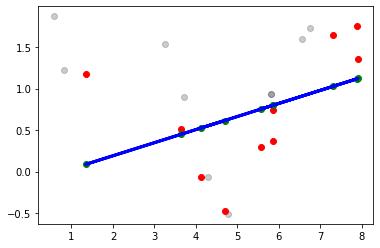

In [73]:
# Plot
plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, y_train_pred, color='green')
plt.plot(X_train, y_train_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

## Polynomial Regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [75]:
degree = 5
polyregr = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ['regr', LinearRegression()]
    ])
polyregr.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ['regr', LinearRegression()]])

In [76]:
poly_train_pred = polyregr.predict(X_train)
poly_test_pred = polyregr.predict(X_test)
print(poly_train_pred)
print(poly_test_pred)
poly_regr = polyregr['regr']
print(f'Coefficients: {poly_regr.coef_} Intercept: {poly_regr.intercept_}')

[ 0.56554276  1.17983727  0.53610874 -0.38889875 -0.15047047  0.57744329
  1.54101235  0.22749204  1.65451056  1.54742221]
[ 0.49421814 -9.64496018 -0.28708333  1.3075993  -4.79096348  0.41006931
  0.49421814  1.3636086   1.45937888 -0.37567545]
Coefficients: [ 0.00000000e+00  4.11625083e+01 -1.95717092e+01  4.08273543e+00
 -3.88867809e-01  1.38766021e-02] Intercept: -27.464621631447976


In [77]:
# Sort the data to plot quad line
xp, yp = zip(*sorted(zip(X_train, poly_train_pred)))

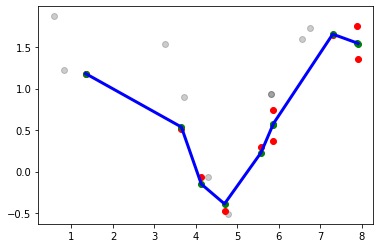

In [78]:
plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train,  color='red')
plt.scatter(xp, yp,  color='green')
plt.plot(xp, yp, color='blue', linewidth=3)
plt.xticks()
plt.yticks()

plt.show()

## Regression Analytic Solution

$$\Theta = (X^TX)^{-1}X^TY$$

In [79]:
def analytic_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def make_polynomial_data_mat(X, degree=1):
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    for i in range(1, degree):
        X = np.insert(X, i + 1, np.power(np.ndarray.flatten(X_train), i + 1), axis=1)
    return X

In [80]:
degrees = [1, 2, 4]

for deg in degrees:
    solution = analytic_solution(make_polynomial_data_mat(X_train, deg), y_train)
    print(f'degree {deg} params: {solution}')

degree 1 params: [-0.12471382  0.15748272]
degree 2 params: [ 2.38902063 -1.07370721  0.1252789 ]
degree 4 params: [-6.80776406 10.91680274 -4.60513795  0.73170903 -0.03884038]


## Ridge

In [81]:
from sklearn.linear_model import Ridge

## Bias-Variance Tradeoff

MSE: 0.9416 coef: [0.         0.15748272] intercept: -0.1247138172375879
Accuracy (bias): 1.3112699858459371 Precision (variance): 0.335496529773609 MSE: 1.646766515619546
MSE: 0.5013 coef: [ 0.         -1.07370721  0.1252789 ] intercept: 2.3890206306991177
Accuracy (bias): 0.5270664803656028 Precision (variance): 1.3129515394426539 MSE: 1.840018019808257
MSE: 1.9504 coef: [ 0.         10.91680274 -4.60513795  0.73170903 -0.03884038] intercept: -6.807764064385664
Accuracy (bias): 30.318284166825627 Precision (variance): 502443.359969301 MSE: 502473.6782534678


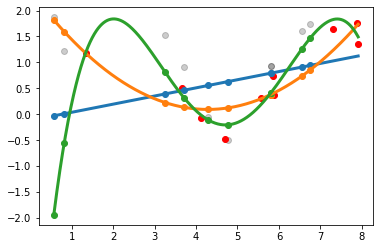

In [82]:
def bias_var_tradeoff(model):
    y_pred = model.predict(X_test)
    regr_step = model['regr']
    print(f'MSE: {mean_squared_error(y_test, y_pred):.4f} coef: {regr_step.coef_} intercept: {regr_step.intercept_}')
    points = np.linspace(0.57, 7.91, 1000).reshape(-1, 1)
    plt.scatter(X_test, y_pred)
    plt.plot(points, model.predict(points), linewidth=3)
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse')
    print(f'Accuracy (bias): {bias} Precision (variance): {var} MSE: {mse}')

plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train,  color='red')

degrees = [1, 2, 4]

for degree in degrees:
    regr =  Pipeline([
            ('poly', PolynomialFeatures(degree)),
            ['regr', LinearRegression()]
        ])
    regr.fit(X_train, y_train)
    bias_var_tradeoff(regr)

plt.xticks()
plt.yticks()
plt.show()

## Logistic Regression

### Data

In [83]:
X_train = np.array([
    [0.346, 0.780],
    [0.303, 0.439],
    [0.358, 0.729],
    [0.602, 0.863],
    [0.790, 0.753],
    [0.611, 0.965],
    ])
y_train = np.array([
    0, 0, 0,
    1, 1, 1
    ])

X_test = np.array([
    [0.959, 0.382],
    [0.750, 0.306],
    [0.395, 0.760],
    [0.823, 0.764],
    [0.761, 0.874],
    [0.844, 0.435],
    ])
y_test = np.array([
    0, 0, 0,
    1, 1, 1
    ])

m = y_train.shape[0]

Theta_0 = np.array([-1, 1.5, 0.5])

learning_rate = 0.1


### Gradient Descent

In [84]:
def gradient_descent(obj_fn, grad_fn, Theta, learning_rate=0.4, epsilon=1e-5, iters=10000, verbose=False):
    count = 0
    Theta_prev = np.inf * np.ones_like(Theta)
    converge = lambda prev, curr: abs(prev - curr) < epsilon
    while not converge(obj_fn(Theta_prev), obj_fn(Theta)):
        Theta_prev = Theta
        print(grad_fn(Theta))
        Theta = Theta - learning_rate * grad_fn(Theta)
        count += 1
        if verbose:
            print(f'Iter #{count}, Theta: {Theta} obj(Theta): {obj_fn(Theta)} obj(Prev): {obj_fn(Theta_prev)}')
        
        print(f'count {count} iters {iters}')
        if count >= iters:
            print(f'Failed to converge in {iters} iters')
            return Theta
    
    print(f'Converged in {count} steps')
    return Theta

### Utils

In [85]:
sigmoid = lambda z: 1.0 / (1 + np.exp(-z))

P = lambda X, Theta: np.clip(sigmoid(X @ Theta), 1e-3, 1 - 1e-3)

# Cross-entropy loss
ce_loss = lambda X, Theta, Y_true: np.sum(-Y_true * np.log(P(X, Theta)) - (1.0 - Y_true) * np.log(1 - P(X, Theta)))
d_ce_loss = lambda X, Theta, Y_true: np.sum((P(X, Theta) - Y_true) * X, axis=0, keepdims=True).T  # Output: column vector

def prob2category(prob_ls, threshold = 0.5):
    prob_ls = prob_ls.copy()
    prob_ls[prob_ls >= threshold] = 1
    prob_ls[prob_ls < threshold] = 0
    return prob_ls

### Model

In [86]:
def logistic_regression(X, y, Theta, learning_rate=0.4, iters=10000):
    
    obj_f = lambda Theta: ce_loss(X, Theta, y)
    d_obj_f = lambda Theta: d_ce_loss(X, Theta, y)

    # Use gradient descent to find the best model
    Theta_optim = gradient_descent(
        obj_f,
        d_obj_f,
        Theta,
        learning_rate=learning_rate,
        iters=iters,
        verbose=True
        )
        
    return Theta_optim

def logistic_predict(X, Theta):
    prob_ls = P(X, Theta)
    print(prob_ls)
    return prob2category(prob_ls)

In [87]:
def test(X, y):
    total = 0
    for i in range(m):
        total += (sigmoid(X[i].T @ Theta_0[:, np.newaxis]) - y[i]) * X[i]
    print(total)

In [88]:
X_train_with_bias = make_polynomial_data_mat(X_train)
test(X_train_with_bias, y_train[:, np.newaxis])
Theta_optim = logistic_regression(
    X_train_with_bias,
    y_train[:, np.newaxis],
    Theta_0[:, np.newaxis],
    learning_rate,
    iters=1
    )
Theta_optim

[ 0.18997559 -0.32105177 -0.11812017]
[[ 0.18997559]
 [-0.32105177]
 [-0.11812017]]
Iter #1, Theta: [[-1.01899756]
 [ 1.53210518]
 [ 0.51181202]] obj(Theta): 3.326448831508982 obj(Prev): 3.341700478528591
count 1 iters 1
Failed to converge in 1 iters


array([[-1.01899756],
       [ 1.53210518],
       [ 0.51181202]])

In [89]:
X_test_with_bias = make_polynomial_data_mat(X_test)
y_pred = logistic_predict(X_test_with_bias, Theta_optim)
y_pred

[[0.65606417]
 [0.57118702]
 [0.4937906 ]
 [0.65315792]
 [0.64434157]
 [0.62169231]]


array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]])

### Scikit-Learn Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(f'coef: {logreg.coef_} intercept: {logreg.intercept_}')

coef: [[0.46880084 0.29379191]] intercept: [-0.45698301]


Scikit-Learn SDG Classifier

In [91]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(
    penalty="none",
    eta0=learning_rate,
    learning_rate="constant",
    tol=1e-5,
    shuffle=False,
    max_iter=10000,
    loss="log"
    )
sgd.fit(X_train, y_train, coef_init=np.array([1.5, 0.5]), intercept_init=-1)

y_pred_sgd = sgd.predict(X_test)

print(f'coef: {sgd.coef_} intercept: {sgd.intercept_}')

coef: [[20.27043531  5.25130418]] intercept: [-13.99287121]


### Data Visualization

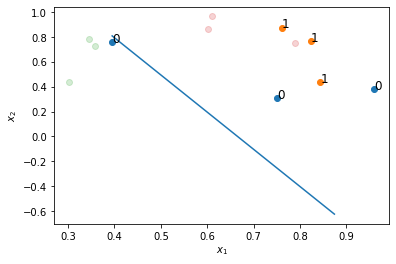

In [92]:
# TEST DATA
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1])
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1])

# TRAIN DATA

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], alpha=0.2)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.2)

for i, label in enumerate(y_test):
    plt.annotate(label, X_test[i, 0:2], fontsize=12)

# Draw decision boundary
X_line = [np.min(X_test_with_bias[:, 1]), np.max(X_test_with_bias[:, 2])]
y_line = -(Theta_optim[0] + Theta_optim[1] * X_line) / Theta_optim[2]
plt.plot(X_line, y_line)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Plot Confusion Matrix

<AxesSubplot:>

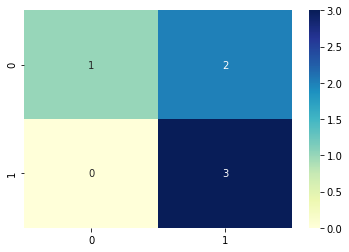

In [93]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='d')

### Evaluation

In [96]:
def evaluate(cnf_matrix): 
    TP, FP, FN, TN = cnf_matrix.flatten()
    print(f'TP: {TP} FP: {FP} FN: {FN} TN: {TN}')
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    print(f'accuracy: {accuracy:.4f} precision: {precision:.4f} recall: {recall:.4f}')

evaluate(cnf_matrix)

TP: 1 FP: 2 FN: 0 TN: 3
accuracy 0.6667 precision 0.3333 recall 1.0000
